In [ ]:
!pip install fer

In [22]:
import os
import random
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from skimage.io import imread
from PIL import Image, ImageDraw
import cv2 as cv
import math
import h5py
import json
from PIL import Image
import cv2
from fer import FER
from fer import Video
import pandas as pd
import time
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
emotion_detecter = FER(mtcnn=True)

In [17]:
output_folder = '/content/drive/MyDrive/Multimodal Project/test_data_video/'

y_true=[]
y_pred=[]

emotions = {
    'ANG':'angry',
    'DIS':'disgust',
    'FEA':'fear',
    'HAP':'happy',
    'NEU':'neutral',
    'SAD':'sad'
}

for files in os.listdir(output_folder):
    if 'wav' not in files:
      file_path = os.path.join(output_folder, files)
      emo = files.split("_")[2]
      y_true.append(emotions[emo])

      video = Video(file_path)
      result = video.analyze(emotion_detecter,display=False)
      emotions_df = video.to_pandas(result)


      df = emotions_df[['angry','happy','sad','neutral','disgust','fear']]
      # Find the maximum value for each row and its corresponding label
      df['max_value'] = df.max(axis=1)
      df['max_label'] = df.idxmax(axis=1)

      # Determine the label with the highest frequency of being the maximum
      max_label_frequency = df['max_label'].value_counts().idxmax()

      # # Print the maximum value for each row and its corresponding label
      # print("Maximum value and label for each row:")
      # print(df[['max_value', 'max_label']])

      # # Print the label with the highest frequency of being the maximum
      # print("\nLabel with the highest frequency of being the maximum:", max_label_frequency)

      y_pred.append(max_label_frequency)

INFO:fer:29.97 fps, 69 frames, 2.30 seconds
INFO:fer:Making directories at output
100%|██████████| 69/69 [00:16<00:00,  4.27frames/s]
INFO:fer:Completed analysis: saved to output/1062_WSI_SAD_XX_output.flv
INFO:fer:Starting to Zip
INFO:fer:Compressing: 72%
INFO:fer:Zip has finished
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['max_value'] = df.max(axis=1)

INFO:fer:29.97 fps, 79 frames, 2.64 seconds
INFO:fer:Making directories at output
100%|██████████| 79/79 [00:13<00:00,  5.92frames/s]
INFO:fer:Completed analysis: saved to output/1062_WSI_NEU_XX_output.flv
INFO:fer:Starting to Zip
INFO:fer:Compressing: 63%
INFO:fer:Zip has finished
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [19]:
y_pred

['angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'happy',
 'angry',
 'angry',
 'angry',
 'angry',
 'sad',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'angry',
 'sad',
 'fear',
 'sad',
 'fear',
 'fear',
 'neutral',
 'happy',
 'happy',
 'neutral',
 'sad',
 'neutral',
 'fear',
 'neutral',
 'angry',
 'angry',
 'happy',
 'neutral',
 'angry',
 'angry',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'happy',
 'happy',
 'disgust',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'sad',
 'neutral',
 'fear',
 'neutral',
 'happy',
 'angry',
 'neutral',
 'fear',
 'fear',
 'neutral',
 'neutral',
 'angry',
 'happy',
 'happy',
 'neutral',
 'sad',
 'neutral',
 'fear',
 'sad',
 'neutral',
 'happy',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'happy',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'fear',
 'happy',
 'neutral',
 'sad',
 'sad',
 'sad',
 'sad',
 'neutral',
 'neutral',
 'neutral',
 'happy',
 'angry',
 'neutral',
 'fear',
 'sad',
 'neutral',


In [20]:
y_true

['sad',
 'neutral',
 'disgust',
 'fear',
 'angry',
 'happy',
 'happy',
 'fear',
 'sad',
 'disgust',
 'angry',
 'disgust',
 'happy',
 'angry',
 'neutral',
 'sad',
 'neutral',
 'fear',
 'neutral',
 'disgust',
 'fear',
 'angry',
 'sad',
 'happy',
 'happy',
 'sad',
 'disgust',
 'angry',
 'fear',
 'neutral',
 'angry',
 'disgust',
 'happy',
 'sad',
 'neutral',
 'fear',
 'neutral',
 'sad',
 'angry',
 'fear',
 'happy',
 'disgust',
 'disgust',
 'angry',
 'angry',
 'disgust',
 'neutral',
 'sad',
 'happy',
 'sad',
 'fear',
 'fear',
 'neutral',
 'happy',
 'disgust',
 'neutral',
 'fear',
 'sad',
 'happy',
 'angry',
 'disgust',
 'fear',
 'happy',
 'neutral',
 'sad',
 'angry',
 'fear',
 'disgust',
 'angry',
 'happy',
 'sad',
 'neutral',
 'angry',
 'happy',
 'disgust',
 'fear',
 'angry',
 'neutral',
 'sad',
 'fear',
 'happy',
 'neutral',
 'sad',
 'disgust',
 'fear',
 'disgust',
 'sad',
 'angry',
 'neutral',
 'happy',
 'disgust',
 'sad',
 'fear',
 'happy',
 'angry',
 'neutral',
 'sad',
 'disgust',
 'fe

Classification Report:
              precision    recall  f1-score   support

       angry       0.19      0.13      0.16        30
     disgust       1.00      0.03      0.06        30
        fear       0.59      0.43      0.50        30
       happy       0.85      0.73      0.79        30
     neutral       0.28      0.80      0.41        30
         sad       0.25      0.20      0.22        30

    accuracy                           0.39       180
   macro avg       0.53      0.39      0.36       180
weighted avg       0.53      0.39      0.36       180

Accuracy: 0.39
Precision: 0.53
Recall: 0.39
F1 Score: 0.36

Confusion Matrix:
[[ 4  0  4  1 21  0]
 [ 8  1  0  2  7 12]
 [ 3  0 13  1  9  4]
 [ 1  0  0 22  6  1]
 [ 3  0  2  0 24  1]
 [ 2  0  3  0 19  6]]


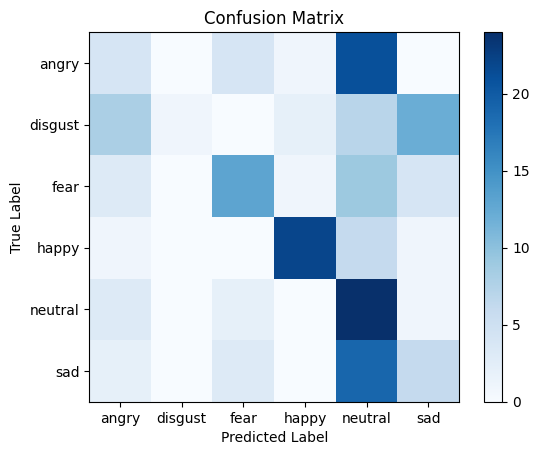

In [23]:
# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Calculate classification metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

# Print classification report
report = classification_report(y_true, y_pred)
print('Classification Report:')
print(report)

# Print individual metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(set(y_true)))
plt.xticks(tick_marks, sorted(set(y_true)))
plt.yticks(tick_marks, sorted(set(y_true)))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Print the confusion matrix
print('\nConfusion Matrix:')
print(cm)

plt.show()